# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
# pprint imported for testing purposes
import pprint
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [54]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [55]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    city_weather = requests.get(city_url).json()

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapoeta
Processing Record 2 of Set 1 | olonkinbyen


Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | akureyri
Processing Record 5 of Set 1 | port mathurin
Processing Record 6 of Set 1 | olyokminsk
Processing Record 7 of Set 1 | muroto-misakicho
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | urazovo
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | tomatlan
Processing Record 12 of Set 1 | kununurra
Processing Record 13 of Set 1 | richards bay
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | kirensk
Processing Record 16 of Set 1 | kone
Processing Record 17 of Set 1 | codrington
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | st. john's
Processing Record 22 of Set 1 | ribeira grande
Processing Record 23 of Set 1 | adamstown
Processing Record 24 of Set 1 | blackmans bay
Processing Record 25 of Set 1 | bilib

In [56]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [57]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapoeta,4.7717,33.5903,33.68,28,45,5.82,SS,1710439110
1,olonkinbyen,70.9221,-8.7187,-9.04,73,100,9.25,SJ,1710438860
2,waitangi,-43.9535,-176.5597,12.44,69,38,3.22,NZ,1710439110
3,akureyri,65.6835,-18.0878,-2.04,59,75,3.60,IS,1710439110
4,port mathurin,-19.6833,63.4167,26.55,79,1,9.70,MU,1710439110


In [58]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapoeta,4.7717,33.5903,33.68,28,45,5.82,SS,1710439110
1,olonkinbyen,70.9221,-8.7187,-9.04,73,100,9.25,SJ,1710438860
2,waitangi,-43.9535,-176.5597,12.44,69,38,3.22,NZ,1710439110
3,akureyri,65.6835,-18.0878,-2.04,59,75,3.60,IS,1710439110
4,port mathurin,-19.6833,63.4167,26.55,79,1,9.70,MU,1710439110


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

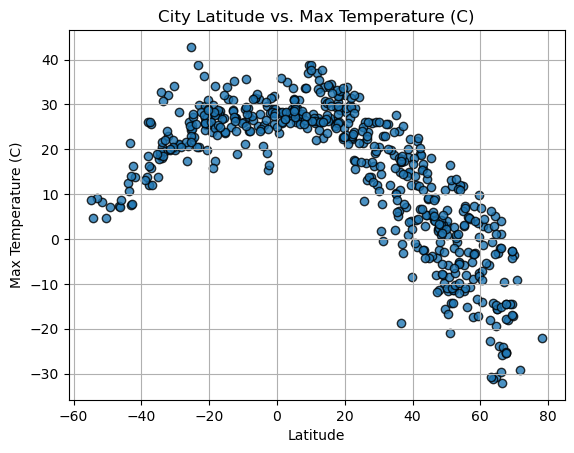

In [60]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

plt.scatter(latitude, temperature, alpha = 0.8, edgecolors= 'black')


# Incorporate the other graph properties
plt.grid ()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

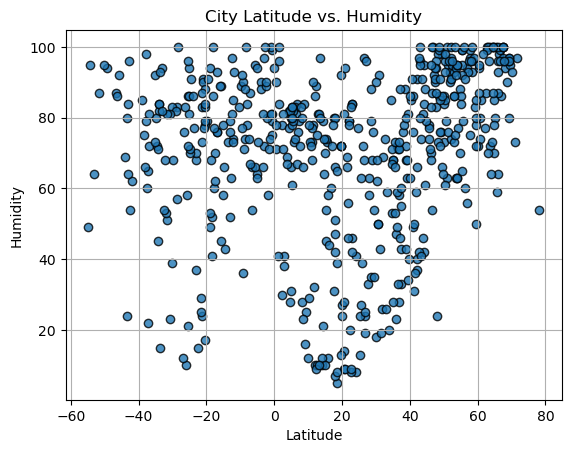

In [61]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']

plt.scatter(latitude, humidity, alpha = 0.8, edgecolors= 'black')

# Incorporate the other graph properties
plt.grid ()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

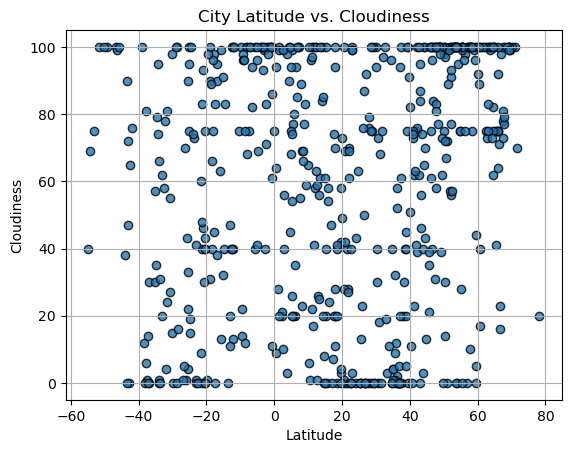

In [62]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']

plt.scatter(latitude, cloudiness, alpha = 0.8, edgecolors= 'black')

# Incorporate the other graph properties
plt.grid ()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

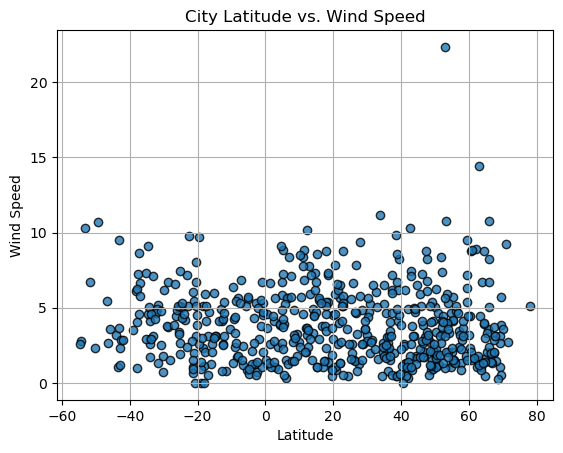

In [63]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']

plt.scatter(latitude, wind_speed, alpha = 0.8, edgecolors= 'black')

# Incorporate the other graph properties
plt.grid ()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots

# i,x,y,j,k = dataframe, x column name, y column name, x axis label, y axis label
def linregplot(i,x,y,j,k):
    lr_slope, lr_int, lr_r, lr_p, lr_std_err = linregress(i[x],i[y])
    lr_fit = lr_slope * i[x] + lr_int
    title = str(f"{j} vs. {k}")
    plt.scatter(i[x],i[y], alpha= 0.8, edgecolors= 'black')
    plt.plot(i[x],lr_fit, 'r', label = 'y = {:.2f} + {:.2f}*x'.format(lr_slope, lr_int))
    plt.legend(loc = 'best')
    plt.xticks(rotation=0)
    plt.xlabel(j)
    plt.ylabel(k)
    plt.title(title)

    print(f"The r-value is: {lr_r}")
    plt.show()

In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapoeta,4.7717,33.5903,33.68,28,45,5.82,SS,1710439110
1,olonkinbyen,70.9221,-8.7187,-9.04,73,100,9.25,SJ,1710438860
3,akureyri,65.6835,-18.0878,-2.04,59,75,3.60,IS,1710439110
5,olyokminsk,60.3736,120.4264,-14.14,94,100,2.33,RU,1710438986
6,muroto-misakicho,33.2833,134.1500,12.13,59,3,1.57,JP,1710439111


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,12.44,69,38,3.22,NZ,1710439110
4,port mathurin,-19.6833,63.4167,26.55,79,1,9.70,MU,1710439110
9,port-aux-francais,-49.3500,70.2167,7.07,94,100,10.69,TF,1710439111
11,kununurra,-15.7667,128.7333,26.99,89,99,2.57,AU,1710439111
12,richards bay,-28.7830,32.0377,20.89,83,100,3.74,ZA,1710438964


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8727236094734842


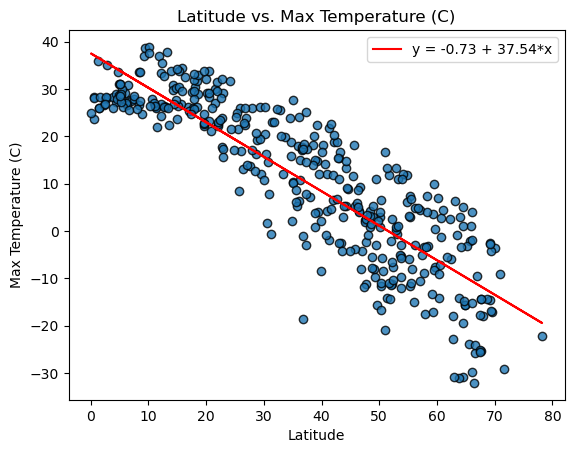

In [67]:
# Linear regression on Northern Hemisphere
linregplot(northern_hemi_df,"Lat", "Max Temp", "Latitude", "Max Temperature (C)")

The r-value is: 0.6597980303498633


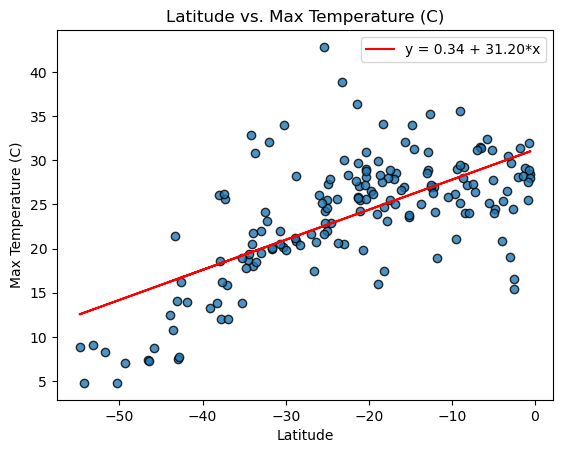

In [68]:
# Linear regression on Southern Hemisphere
linregplot(southern_hemi_df,"Lat", "Max Temp", "Latitude", "Max Temperature (C)")

**Discussion about the linear relationship:** There is a clear correlation showing higher temperatures as Latitude tends towards 0. This correlation is much clearer in the Northern Hemisphere, with a strong negative correlation. The southern hemisphere shows a weaker positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.44039214306367147


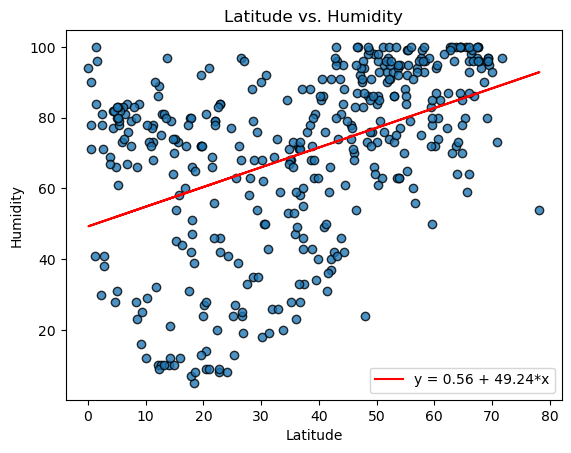

In [69]:
# Northern Hemisphere
linregplot(northern_hemi_df,"Lat", "Humidity", "Latitude", "Humidity")

The r-value is: 0.11273004492182342


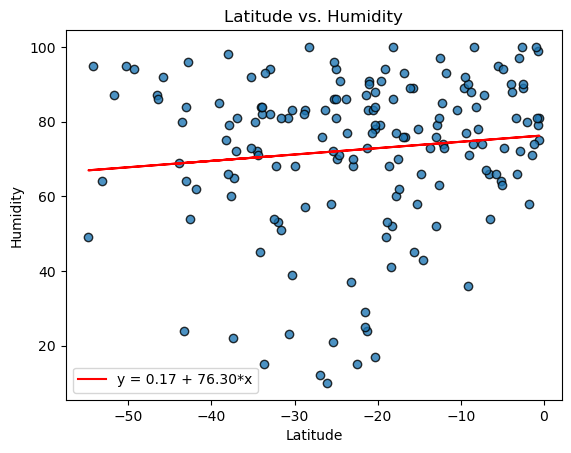

In [70]:
# Southern Hemisphere
linregplot(southern_hemi_df,"Lat", "Humidity", "Latitude", "Humidity")

**Discussion about the linear relationship:** The northern hemisphere shows a positive correlation suggesting that humidity increases as latitude increases, however the southern hemisphere shows no clear correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.29935117494306723


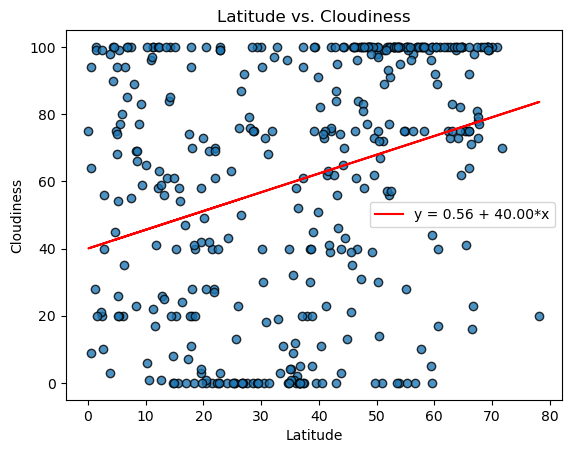

In [71]:
# Northern Hemisphere
linregplot(northern_hemi_df,"Lat", "Cloudiness", "Latitude", "Cloudiness")

The r-value is: 0.2490708781976852


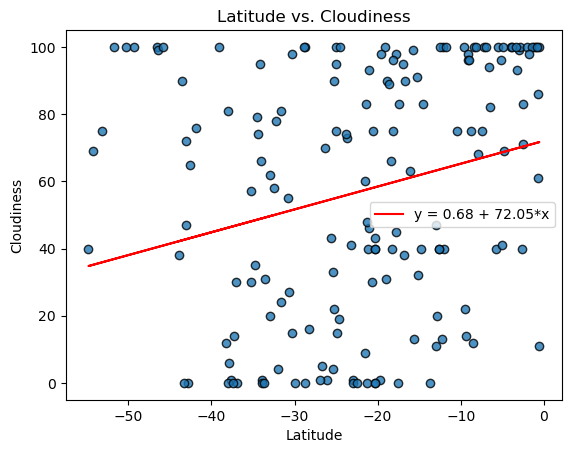

In [72]:
# Southern Hemisphere
linregplot(southern_hemi_df,"Lat", "Cloudiness", "Latitude", "Cloudiness")

**Discussion about the linear relationship:**  There are a large number of outliers in this data for Cloudiness which may make the vizualisations unreliable, however a positive trend is displayed in both plots, suggesting that Cloudiness increases as you move north.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.06770716259219753


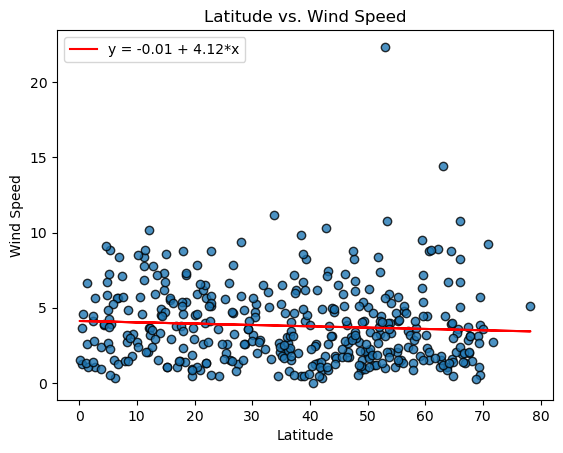

In [73]:
# Northern Hemisphere
linregplot(northern_hemi_df,"Lat", "Wind Speed", "Latitude", "Wind Speed")

The r-value is: -0.22800888901979846


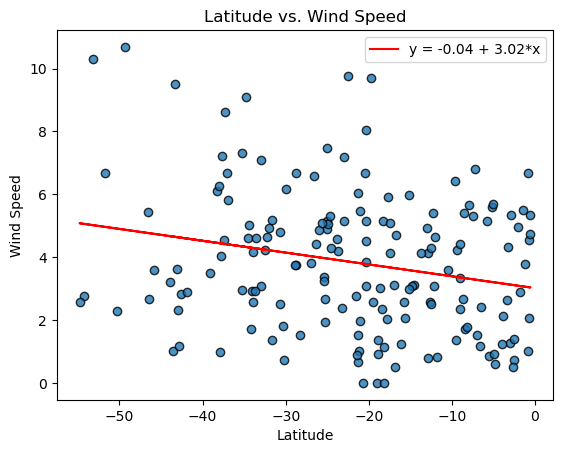

In [74]:
# Southern Hemisphere
linregplot(southern_hemi_df,"Lat", "Wind Speed", "Latitude", "Wind Speed")

**Discussion about the linear relationship:** There is no correlation shown between Latitude and Wind Speed, as it can vary significantly and does not appear to be affected by latitude. This is shown both in the plots and the r-values being close to 0.